In [35]:

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

#ver relaciones entre datos. que datos depende de otros. cuales son redundantes y no aportan informacion. 


In [36]:
dsSell2013 = pd.read_csv("sell2013.csv", low_memory=False)
dsSell2014 = pd.read_csv("sell2014.csv", low_memory=False)
dsSell2015 = pd.read_csv("sell2015.csv", low_memory=False)
dsSell2016 = pd.read_csv("sell2016.csv", low_memory=False)
dsSell2017 = pd.read_csv("sell2017.csv", low_memory=False)

In [37]:
dsSell2013.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,image_thumbnail
0,2012-08-08,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,3436077.0,"-34.561208,-58.464514",-34.561208,-58.464514,NaN,NaN,NaN,NaN,102.0,NaN,10.0,3.0,850 aprox,http://www.properati.com.ar/ag_venta_departame...,http://cf-thumbs.properati.com.ar/Cry7pVKa41t_...
1,2012-08-08,sell,apartment,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3427467.0,"-34.54673,-58.550579",-34.546730,-58.550579,NaN,NaN,NaN,NaN,73.0,NaN,11.0,3.0,NaN,http://www.properati.com.ar/ah_venta_departame...,http://cf-thumbs.properati.com.ar/MwrzW_dkQbqR...
2,2012-08-08,sell,house,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3427467.0,"-34.543776,-58.559615",-34.543776,-58.559615,NaN,NaN,NaN,NaN,485.0,NaN,NaN,4.0,NaN,http://www.properati.com.ar/aj_venta_casa_vill...,http://cf-thumbs.properati.com.ar/2wMqxAsh1N2t...
3,2012-08-08,sell,house,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3427467.0,NaN,NaN,NaN,110000.0,USD,649603.74,110000.0,349.0,315.186246,NaN,4.0,NaN,http://www.properati.com.ar/ak_venta_casa_vill...,http://cf-thumbs.properati.com.ar/uMwzJsvexa1C...
4,2012-08-08,sell,apartment,Loma Hermosa,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,NaN,"-34.568371,-58.598724",-34.568371,-58.598724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,http://www.properati.com.ar/ao_venta_departame...,http://cf-thumbs.properati.com.ar/4kPnofvgR6hs...


In [38]:
dsSell2014.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_in_m2', 'price_usd_per_m2', 'floor', 'rooms', 'expenses',
       'properati_url', 'image_thumbnail'],
      dtype='object')

In [39]:
dsSell2015.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'extra', 'image_thumbnail'],
      dtype='object')

In [77]:
#unimos todos los csv y filtramos para que solo queda GBA y CABA
dsSell = dsSell2013.append(dsSell2014).append(dsSell2015).append(dsSell2016).append(dsSell2017)


#filtrar con la lat long, o preguntar ocmo hacemos con los q no tienen ningun valor. 
#sino podemos filtrar a todos los  qno son nan y si es nan ir al campo descripcion a ver si es de gba y asi pero mas jodido creo
#patterns = ['Capital Federal', 'Bs.As. G.B.A.']
#dsSell = dsSell[dsSell['state_name'].str.contains('|'.join(patterns))]

In [ ]:
#Queremos quedarnos con la zona, el municipio y los que esten en CABA y GBA

dsSell['municipio'] = dsSell['place_with_parent_names'].apply(lambda x: x.split('|')[3])
dsSell['zona'] = dsSell['place_with_parent_names'].apply(lambda x: x.split('|')[2])

dsSell['filtro'] = dsSell['zona'].apply(lambda x: ((x=='Capital Federal')or(x=='Bs.As. G.B.A. Zona Norte')or(x=='Bs.As. G.B.A. Zona Sur')or(x=='Bs.As. G.B.A. Zona Oeste')))
dsSell = dsSell[dsSell.filtro]
dsSell.drop('filtro', axis=1, inplace=True)

In [ ]:
#Como nos importa mucho el precio con respecto a otras cosas vamos a sacar a los que tienen esa columna en NaN

dsSell['tiene_precio'] = dsSell['price'].apply(lambda x: pd.notnull(x))
dsSell = dsSell[dsSell.tiene_precio]
dsSell.drop('tiene_precio', axis=1, inplace=True)

In [ ]:
dsSell.groupby('municipio').price_aprox_usd.mean().head()

In [41]:
dsSell.columns

Index(['created_on', 'currency', 'description', 'expenses', 'extra', 'floor',
       'geonames_id', 'id', 'image_thumbnail', 'lat', 'lat-lon', 'lon',
       'operation', 'place_name', 'place_with_parent_names', 'price',
       'price_aprox_local_currency', 'price_aprox_usd', 'price_per_m2',
       'price_usd_per_m2', 'properati_url', 'property_type', 'rooms',
       'state_name', 'surface_covered_in_m2', 'surface_in_m2',
       'surface_total_in_m2', 'title'],
      dtype='object')

In [42]:
#cuantos tipos de vivienda se vende

dsSell['property_type'].value_counts()

apartment    286273
house        176036
PH            27935
store         13906
Name: property_type, dtype: int64

In [43]:
#lugares donde mas se vende
dsSell['place_name'].value_counts()

Mar del Plata                     39293
Córdoba                           19935
Rosario                           19812
Tigre                             12673
Capital Federal                   12652
Ramos Mejía                       12649
Nordelta                          12314
Pilar                             10824
Belgrano                          10758
Palermo                            9631
Punta del Este                     9299
La Plata                           7993
Caballito                          7147
Olivos                             6418
Ituzaingó                          6188
Morón                              6156
Pinamar                            5737
San Isidro                         5258
Villa Urquiza                      5152
Haedo                              5114
Santa Fe                           4995
Villa Crespo                       4992
Barrio Norte                       4847
Flores                             4824
Recoleta                           4703


In [45]:
dsSell['place_name'].value_counts()

Mar del Plata                     39293
Córdoba                           19935
Rosario                           19812
Tigre                             12673
Capital Federal                   12652
Ramos Mejía                       12649
Nordelta                          12314
Pilar                             10824
Belgrano                          10758
Palermo                            9631
Punta del Este                     9299
La Plata                           7993
Caballito                          7147
Olivos                             6418
Ituzaingó                          6188
Morón                              6156
Pinamar                            5737
San Isidro                         5258
Villa Urquiza                      5152
Haedo                              5114
Santa Fe                           4995
Villa Crespo                       4992
Barrio Norte                       4847
Flores                             4824
Recoleta                           4703


In [46]:
dsSell[['place_name', 'price']]

,place_name,price
0,Belgrano,NaN
1,Villa Ballester,NaN
2,Villa Ballester,NaN
3,Villa Ballester,110000.0
4,Loma Hermosa,NaN
5,Villa Ballester,NaN
6,San Martín,99000.0
7,Villa Ballester,NaN
8,Villa Ballester,NaN
9,Berazategui,NaN


In [47]:
aux = dsSell.groupby('place_name').mean().reset_index().sort_values(by = 'price',ascending= False)[['place_name', 'price']]
aux

,place_name,price
778,Lavalle,2.500000e+07
1458,Área de Promoción El Triángulo,6.000000e+06
393,Colonia Santa Rosa,5.000000e+06
1204,San Roque,4.361614e+06
991,Pico Truncado,3.800000e+06
473,Dorrego,3.671752e+06
618,Güer Aike,3.025000e+06
1446,Yerba Buena,2.887920e+06
834,Macachín,2.800000e+06
51,Aristóbulo del Valle,2.700000e+06


<IPython.core.display.Javascript object>


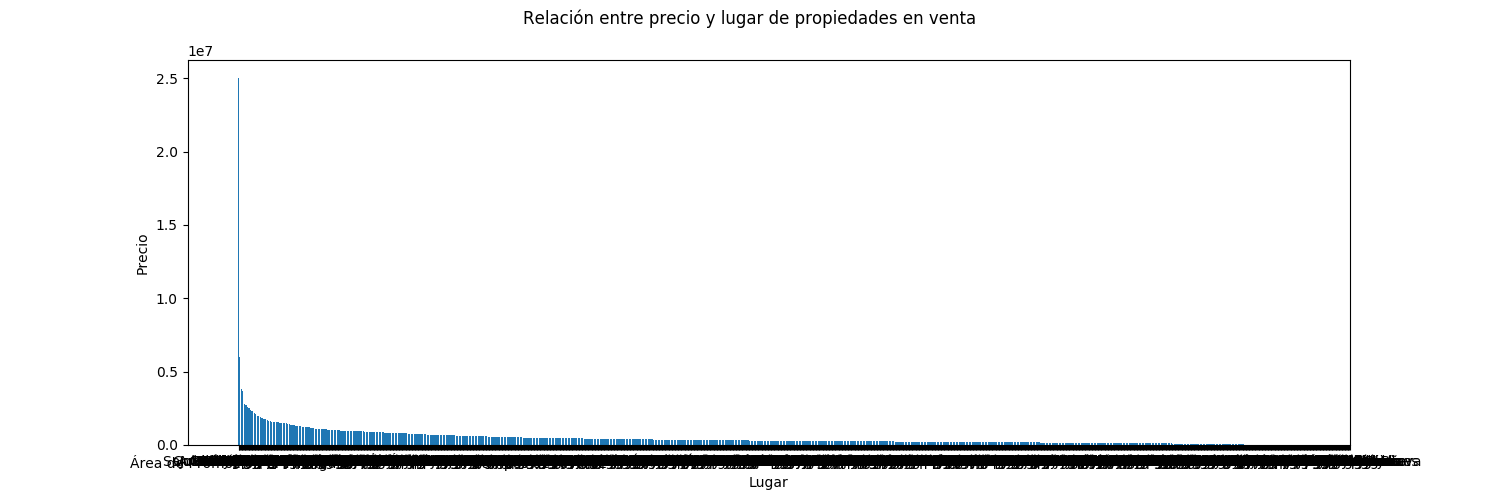

In [48]:
%matplotlib notebook

numeros = list(range(0, len(aux['place_name'])))
plt.bar(numeros, aux['price'])
plt.suptitle("Relación entre precio y lugar de propiedades en venta")
plt.xlabel("Lugar")
plt.ylabel("Precio")
plt.xticks(numeros, aux['place_name'])
plt.show()




In [49]:
aux = dsSell.groupby('place_name').count().reset_index().sort_values(by = 'price',ascending= False)[['place_name', 'price']]
aux

,place_name,price
857,Mar del Plata,33685
451,Córdoba,15055
1281,Tigre,12115
929,Nordelta,11696
314,Capital Federal,11499
1111,Rosario,10459
993,Pilar,10249
250,Belgrano,9514
1076,Ramos Mejía,9379
1063,Punta del Este,9019


<IPython.core.display.Javascript object>


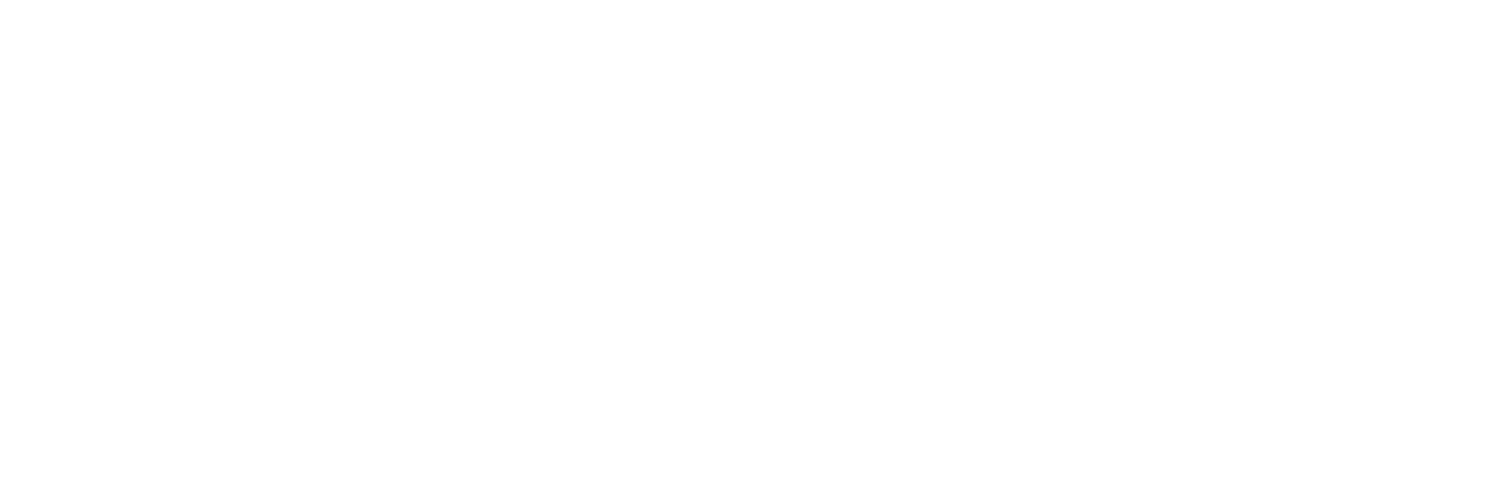

In [50]:
%matplotlib notebook

numeros = list(range(0, len(aux['place_name'])))
plt.bar(numeros, aux['price'])
plt.suptitle("Relación entre lugar y cantidad de publicaciones de ese lugar")
plt.xlabel("Lugar")
plt.ylabel("Precio")
plt.xticks(numeros, aux['place_name'])
plt.show()



In [51]:

#formatear datos stirng a float
#convertimos el formato de la fecha
dsSell['created_on'] = dsSell['created_on'] .map(lambda x: x.split('-')[0]+x.split('-')[1]+x.split('-')[2])
dsSell

,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,lat,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,20120808,NaN,NaN,850 aprox,NaN,10.0,3436077.0,NaN,http://cf-thumbs.properati.com.ar/Cry7pVKa41t_...,-34.561208,...,NaN,NaN,http://www.properati.com.ar/ag_venta_departame...,apartment,3.0,NaN,NaN,102.0,NaN,NaN
1,20120808,NaN,NaN,NaN,NaN,11.0,3427467.0,NaN,http://cf-thumbs.properati.com.ar/MwrzW_dkQbqR...,-34.546730,...,NaN,NaN,http://www.properati.com.ar/ah_venta_departame...,apartment,3.0,NaN,NaN,73.0,NaN,NaN
2,20120808,NaN,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/2wMqxAsh1N2t...,-34.543776,...,NaN,NaN,http://www.properati.com.ar/aj_venta_casa_vill...,house,4.0,NaN,NaN,485.0,NaN,NaN
3,20120808,USD,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/uMwzJsvexa1C...,NaN,...,NaN,315.186246,http://www.properati.com.ar/ak_venta_casa_vill...,house,4.0,NaN,NaN,349.0,NaN,NaN
4,20120808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/4kPnofvgR6hs...,-34.568371,...,NaN,NaN,http://www.properati.com.ar/ao_venta_departame...,apartment,3.0,NaN,NaN,NaN,NaN,NaN
5,20120808,NaN,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/FM2TFWbn2tlq...,-34.553995,...,NaN,NaN,http://www.properati.com.ar/aw_venta_casa_vill...,house,4.0,NaN,NaN,383.0,NaN,NaN
6,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/BJum1WvpYb6P...,-34.542278,...,NaN,647.058824,http://www.properati.com.ar/ax_venta_casa_san-...,house,NaN,NaN,NaN,153.0,NaN,NaN
7,20120808,NaN,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/0WZXMAZwqAqL...,-34.553385,...,NaN,NaN,http://www.properati.com.ar/be_venta_casa_vill...,house,5.0,NaN,NaN,NaN,NaN,NaN
8,20120808,NaN,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/gINhQeh4k8EY...,-34.561914,...,NaN,NaN,http://www.properati.com.ar/bg_venta_casa_vill...,house,5.0,NaN,NaN,238.0,NaN,NaN
9,20120808,NaN,NaN,NaN,NaN,NaN,3436042.0,NaN,http://cf-thumbs.properati.com.ar/Ouk-RgZFDXzR...,NaN,...,NaN,NaN,http://www.properati.com.ar/f5_venta_casa_bera...,house,5.0,NaN,NaN,436.0,NaN,NaN


In [52]:
#pasar precios a pesos argentinos


#usamos un promedio aprox del dolar en estos 4 años. se peude hacer ocn mas precisión
dsSell['priceInUsd'] = dsSell[['price', 'currency']].apply(lambda x: x[0] if x[1] == 'USD' else x[0] / 14, axis=1) 

dsSell['priceInUsd']

0                  NaN
1                  NaN
2                  NaN
3         1.100000e+05
4                  NaN
5                  NaN
6         9.900000e+04
7                  NaN
8                  NaN
9                  NaN
10        1.100000e+05
11        6.500000e+05
12        3.000000e+05
13        6.000000e+05
14        2.200000e+05
15                 NaN
16        5.190000e+04
17        1.950000e+05
18        1.150000e+05
19        1.950000e+05
20        6.900000e+04
21        6.120000e+04
22        1.100000e+06
23        3.200000e+05
24        2.800000e+05
25        1.385000e+05
26        1.900000e+05
27        5.300000e+05
28        1.750000e+05
29        1.200000e+05
              ...     
187452             NaN
187453             NaN
187454             NaN
187455             NaN
187456             NaN
187457             NaN
187458             NaN
187459             NaN
187460             NaN
187461             NaN
187462             NaN
187463             NaN
187464     

In [53]:
#vemos como evolucionan algunos features en el tiempo para la renta

cantidadRentEnAnios = dsSell.groupby('created_on').count().reset_index().rename(columns={'price':'cantidad'}).sort_values(by = 'created_on',ascending= True)[['created_on', 'cantidad']]
preciosRentEnAnios = dsSell.groupby('created_on').mean().reset_index().sort_values(by = 'created_on',ascending= True)[['created_on', 'priceInUsd']]

<IPython.core.display.Javascript object>


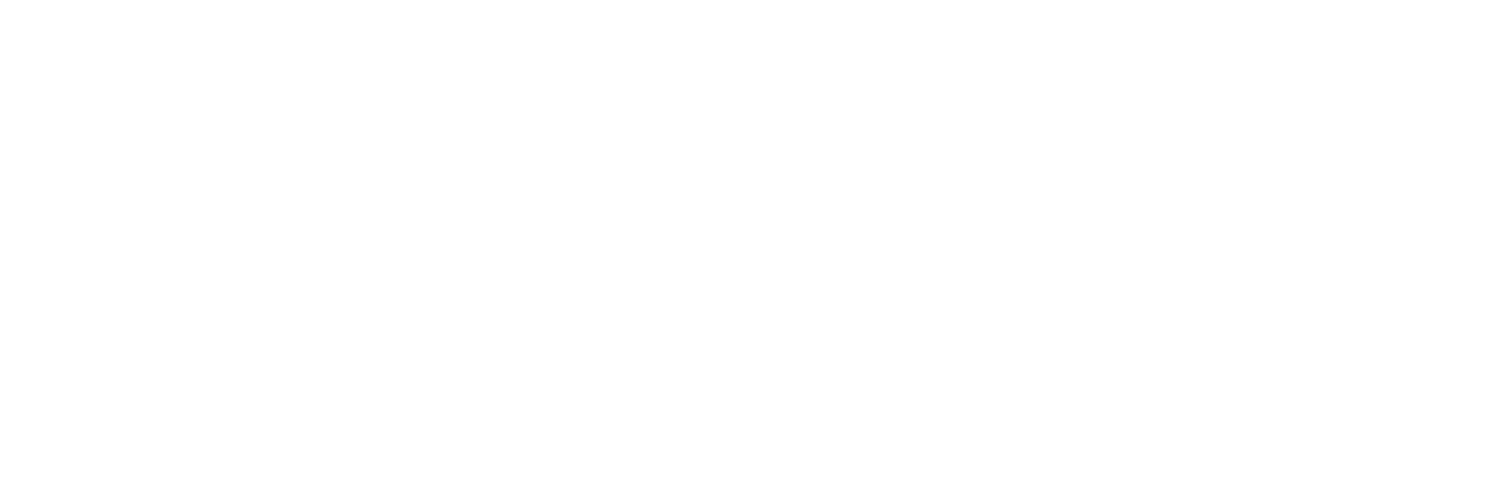

In [54]:
%matplotlib notebook

numeros = list(range(0, len(cantidadRentEnAnios['created_on'])))
plt.bar(numeros, cantidadRentEnAnios['cantidad'])
plt.suptitle("Evolución de cantidad de rentas en el tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad Rentas")
plt.xticks(numeros, cantidadRentEnAnios['created_on'])
plt.show()

#ajustar ESCALAS


<IPython.core.display.Javascript object>


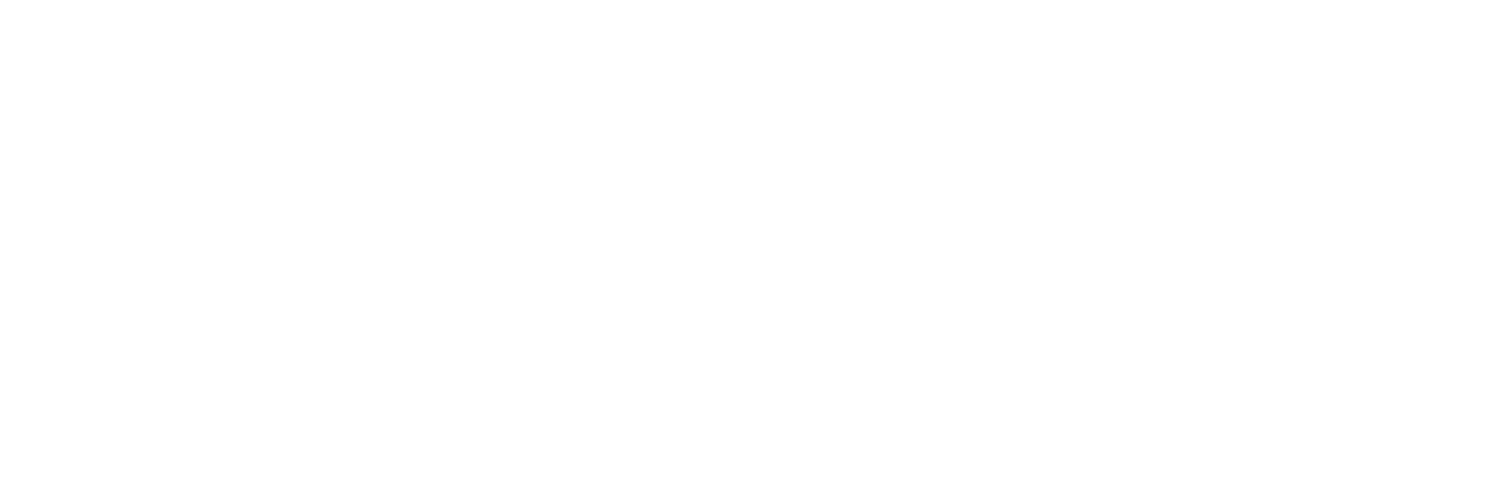

In [55]:
%matplotlib notebook

numeros = list(range(0, len(preciosRentEnAnios['created_on'])))
plt.bar(numeros, preciosRentEnAnios['priceInUsd'])
plt.suptitle("Evolución del precio a lo largo del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.xticks(numeros, preciosRentEnAnios['created_on'])
plt.show()


In [56]:
dsSell['currency'].value_counts()

USD    364909
ARS     48610
BRL        18
PEN         2
UYU         1
Name: currency, dtype: int64

In [57]:
#Cantidad de viviendas vendidas en dolares y pesos a lo largo del tiempo
cantidadRentEnAniosEnDolares = dsSell[dsSell['currency'] == 'USD'].groupby('created_on').count().reset_index().rename(columns={'price':'cantidad'}).sort_values(by = 'created_on',ascending= True)[['created_on', 'cantidad']]
cantidadRentEnAniosEnPesos = dsSell[dsSell['currency'] == 'ARS'].groupby('created_on').count().reset_index().rename(columns={'price':'cantidad'}).sort_values(by = 'created_on',ascending= True)[['created_on', 'cantidad']]

<IPython.core.display.Javascript object>


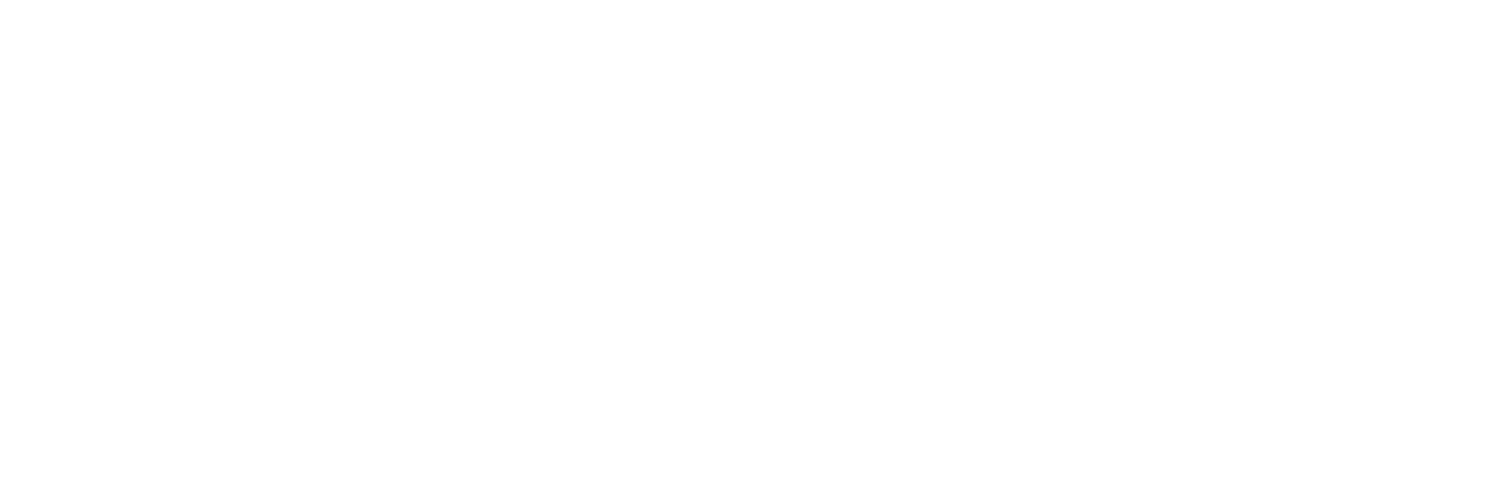

In [58]:
%matplotlib notebook

numeros = list(range(0, len(cantidadRentEnAniosEnDolares['created_on'])))
plt.bar(numeros, cantidadRentEnAniosEnDolares['cantidad'])
plt.suptitle("Evolución de cantidad de rentas en el tiempo en dolares")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad Rentas")
plt.xticks(numeros, cantidadRentEnAniosEnDolares['created_on'])
plt.show()


<IPython.core.display.Javascript object>


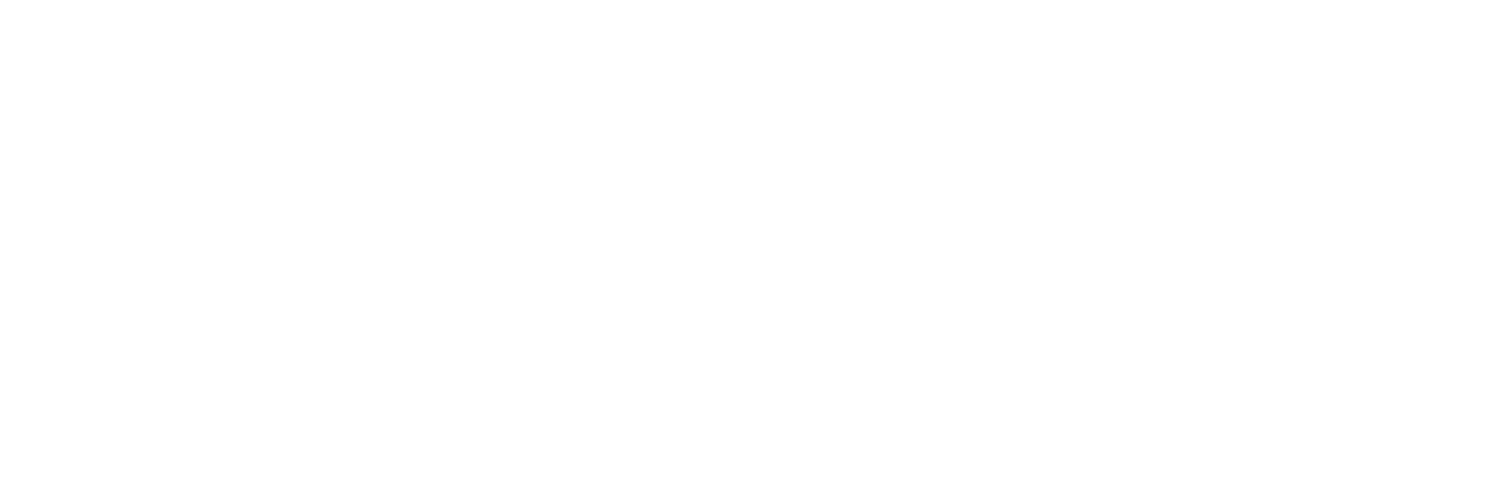

In [59]:
%matplotlib notebook

numeros = list(range(0, len(cantidadRentEnAniosEnPesos['created_on'])))
plt.bar(numeros, cantidadRentEnAniosEnPesos['cantidad'])
plt.suptitle("Evolución de cantidad de rentas en el tiempo en pesos")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad Rentas")
plt.xticks(numeros, cantidadRentEnAniosEnPesos['created_on'])
plt.show()

In [60]:
#analizamos el precio de los lugares a lo largo del tiempo

aux = dsSell.groupby(['place_name', 'created_on']).mean().reset_index().sort_values(by = 'price',ascending= False)[['place_name', 'created_on','priceInUsd']]
aux


,place_name,created_on,priceInUsd
48986,Nuñez,20150827,9.749258e+06
45309,Monte Hermoso,20170117,7.936508e+06
45299,Monte Hermoso,20161205,3.988254e+06
71949,San Roque,20170720,3.952648e+06
37282,Loma Verde,20160802,5.000000e+07
37207,Loma Hermosa,20150424,3.500000e+07
88281,Yerba Buena,20170727,2.142857e+06
36532,Lavalle,20151117,1.785714e+06
65259,Salta,20150822,1.642857e+06
66837,San Carlos de Bariloche,20170619,1.550000e+07


<IPython.core.display.Javascript object>


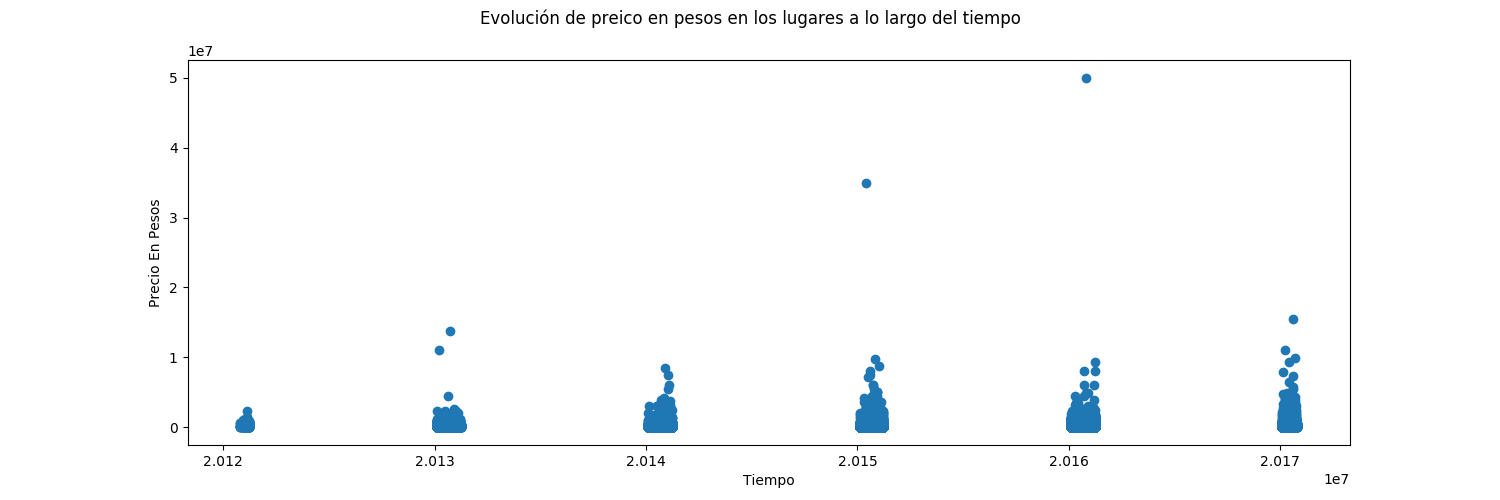

In [61]:
#ESTO ESTA BASTATNE MAL 


%matplotlib notebook

plt.scatter(aux['created_on'], aux['priceInUsd'])
plt.suptitle("Evolución de preico en pesos en los lugares a lo largo del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Precio En Pesos")
#plt.xticks(numeros, cantidadRentEnAniosEnPesos['created_on'])
plt.show()

In [62]:
dsSell.columns

Index(['created_on', 'currency', 'description', 'expenses', 'extra', 'floor',
       'geonames_id', 'id', 'image_thumbnail', 'lat', 'lat-lon', 'lon',
       'operation', 'place_name', 'place_with_parent_names', 'price',
       'price_aprox_local_currency', 'price_aprox_usd', 'price_per_m2',
       'price_usd_per_m2', 'properati_url', 'property_type', 'rooms',
       'state_name', 'surface_covered_in_m2', 'surface_in_m2',
       'surface_total_in_m2', 'title', 'priceInUsd'],
      dtype='object')

In [67]:
#borrar los aprox de expenses
#pasar price_per_m2 y price_usd_per_m2 a una sola que sea price_usd_per_m2
dsSell.head()

,created_on,description,expenses,floor,geonames_id,lat,lon,place_name,place_with_parent_names,price,price_aprox_local_currency,price_per_m2,price_usd_per_m2,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,priceInUsd
0,20120808,NaN,850 aprox,10.0,3436077.0,-34.561208,-58.464514,Belgrano,|Argentina|Capital Federal|Belgrano|,NaN,NaN,NaN,NaN,apartment,3.0,NaN,NaN,102.0,NaN,NaN
1,20120808,NaN,NaN,11.0,3427467.0,-34.546730,-58.550579,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,NaN,NaN,apartment,3.0,NaN,NaN,73.0,NaN,NaN
2,20120808,NaN,NaN,NaN,3427467.0,-34.543776,-58.559615,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,NaN,NaN,house,4.0,NaN,NaN,485.0,NaN,NaN
3,20120808,NaN,NaN,NaN,3427467.0,NaN,NaN,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,110000.0,649603.74,NaN,315.186246,house,4.0,NaN,NaN,349.0,NaN,110000.0
4,20120808,NaN,NaN,NaN,NaN,-34.568371,-58.598724,Loma Hermosa,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,NaN,NaN,NaN,NaN,apartment,3.0,NaN,NaN,NaN,NaN,NaN


In [31]:
#sobre esto tal vez se puede hacer analisis de texto. tambien analizar la imagen..
dsSell[['description', 'image_thumbnail']]

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
5                                                       NaN
6                                                       NaN
7                                                       NaN
8                                                       NaN
9                                                       NaN
10                                                      NaN
11                                                      NaN
12                                                      NaN
13                                                      NaN
14                                                      NaN
15                                                      NaN
16                                      

In [78]:
#drop de columnas

dsSell.drop('currency', axis=1, inplace=True)
dsSell.drop('extra', axis=1, inplace=True)
dsSell.drop('id', axis=1, inplace=True)
dsSell.drop('image_thumbnail', axis=1, inplace=True)
dsSell.drop('properati_url', axis=1, inplace=True)
dsSell.drop('title', axis=1, inplace=True)
dsSell.drop('lat-lon', axis=1, inplace=True)
dsSell.drop('operation', axis=1, inplace=True)
dsSell.drop('price_aprox_usd', axis=1, inplace=True)
dsSell.drop('price', axis=1, inplace=True)
dsSell.drop('price_aprox_local_currency', axis=1, inplace=True)
dsSell.drop('country_name', axis=1, inplace=True)

In [79]:
#one hot encoding de los place name. me suena mal muchas columnas. performance

one_hot = pd.get_dummies(dsSell['place_name'])
dsSell.drop('place_name', axis=1, inplace=True)
dsSell = dsSell.join(one_hot)

In [86]:
dsSell

,created_on,description,expenses,floor,geonames_id,lat,lon,place_with_parent_names,price_per_m2,price_usd_per_m2,...,Zeballos,Zelaya,Zenón Pereyra,Zona Portuaria,Zonda,Zárate,coordenadas 34.255511,Álvarez,"Área 6 ""Nuestra Señora de Loreto""",Área de Promoción El Triángulo
0,2012-08-08,NaN,850 aprox,10.0,3436077.0,-34.561208,-58.464514,|Argentina|Capital Federal|Belgrano|,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
0,2012-08-08,NaN,850 aprox,10.0,3436077.0,-34.561208,-58.464514,|Argentina|Capital Federal|Belgrano|,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
0,2012-08-08,NaN,850 aprox,10.0,3436077.0,-34.561208,-58.464514,|Argentina|Capital Federal|Belgrano|,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
0,2012-08-08,NaN,850 aprox,10.0,3436077.0,-34.561208,-58.464514,|Argentina|Capital Federal|Belgrano|,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
0,2012-08-08,NaN,850 aprox,10.0,3436077.0,-34.561208,-58.464514,|Argentina|Capital Federal|Belgrano|,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
0,2012-08-08,NaN,NaN,NaN,3427467.0,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
0,2012-08-08,NaN,NaN,NaN,3427467.0,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
0,2012-08-08,NaN,NaN,NaN,3427467.0,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
0,2012-08-08,NaN,NaN,NaN,3427467.0,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
0,2012-08-08,NaN,NaN,NaN,3427467.0,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Vemos que zona tiene mas propiedades vendidas
%matplotlib notebook
nombre_zona = ['CABA', 'Zona Norte', 'Zona Oeste', 'Zona Sur']
cosa = [1, 2, 3, 4]
cant = dsSell['zona'].value_counts()
precios_zona = [cant[0], cant[1], cant[2], cant[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades vendidas por zona")
plt.xlabel("Nombre de la zona")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

In [ ]:
#Calculamos que tipo de propiedad se vende mas en Zona Norte
%matplotlib notebook
nombre_zona = ['house', 'apartment', 'PH', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell[dsSell.zona == 'Bs.As. G.B.A. Zona Norte']['property_type'].value_counts()
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Zona Norte")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

In [ ]:
#Calculamos que tipo de propiedad se vende mas en Zona Sur
%matplotlib notebook
nombre_zona = ['house', 'apartment', 'PH', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell[dsSell.zona == 'Bs.As. G.B.A. Zona Sur']['property_type'].value_counts()
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Zona Sur")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

In [ ]:
#Calculamos que tipo de propiedad se vende mas en Zona Oeste
%matplotlib notebook
nombre_zona = ['apartment', 'house', 'PH', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell[dsSell.zona == 'Bs.As. G.B.A. Zona Oeste']['property_type'].value_counts()
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Zona Oeste")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

In [ ]:
#Calculamos que tipo de propiedad se vende mas en Capital Federal
%matplotlib notebook
nombre_zona = ['apartment', 'house', 'PH', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell[dsSell.zona == 'Capital Federal']['property_type'].value_counts()
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Capital Federal")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

In [ ]:
#Calculamos cuanto sale cada tipo en promedio en Capital Federal
%matplotlib notebook
nombre_zona = ['apartment', 'house', 'PH', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell[dsSell.zona == 'Capital Federal']['aprox_price_usd'].value_counts()
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Capital Federal")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

In [ ]:
#Calculamos cuanto sale cada tipo en promedio 
%matplotlib notebook
nombre_zona = ['PH', 'apartment', 'house', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell.groupby('property_type').mean()['price_aprox_usd']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Costo promedio por tipo")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Costo promedio")
plt.xticks(cosa, nombre_zona)

In [ ]:
#Vemos que zona es mas cara en promedio
%matplotlib notebook
nombre_zona = ['Zona Norte', 'Zona Oeste', 'Zona Sur', 'Capital Federal']
cosa = [1, 2, 3, 4]
typ = dsSell.groupby('zona').mean()['price_aprox_usd']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Costo promedio por zona")
plt.xlabel("Zona")
plt.ylabel("Costo promedio")
plt.xticks(cosa, nombre_zona)

In [ ]:
#Que cantidad de ambientes se vende mas?
%matplotlib notebook
cosa = [2, 3, 1, 4, 5]
typ = dsSell['rooms'].value_counts()
precios_piso = [typ[2], typ[3], typ[1], typ[4], typ[5]]
plt.bar(cosa, precios_piso)
plt.title('Top 5 de propiedades vendidas por cantidad de ambientes')
plt.xlabel('Numero de ambientes')
plt.ylabel('Cantidad de propiedades vendidas')

In [ ]:
#Caculamos la superficie promedio de cada tipo de propiedad
%matplotlib notebook
cosa = [1, 2, 3, 4]
nombre_tipo=['house', 'apartment', 'house', 'store']
typ = dsSell.groupby('property_type').mean()['surface_in_m2']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Superficia promedio por tipo de propiedad")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Superficie promedio")
plt.xticks(cosa, nombre_tipo)